In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf as sql

To convert this notebook to an html file, execute **jupyter nbconvert --to html ishtiakn_statflo-code-test.ipynb**

### 1. Using Python, parse the provided csv file and load the data into a pandas DataFrame.

In [32]:
#Set index_col=0 since that has the primary key
df = pd.read_csv('data.csv', index_col=0)
df

,transaction_date,product_name,price,store_name,sales_representative_name,client_name
transaction_id,,,,,,
t005,28-02-23,americano,4.00,Queen St,NaN,Christopher Thomas
t005,28-02-23,americano,4.00,Queen St,Christopher Thomas,NaN
t004,27-02-23,cappuccino,NaN,King St,Andrew Miller,Jennifer Brown
t003,26-02-23,espresso,3.50,NaN,Samantha Wilson,Michael Thompson
t002,25-02-23,NaN,3.75,Queen St,Sarah Davis,Robert Anderson
k115,24-02-23,cappuccino,4.50,King St,Lex Monroe,Joshua Farley
q235,23-02-23,americano,4.00,Queen St,Britany Hebert,Joshua Farley
q234,23-02-23,cappuccino,4.50,Queen St,Amal Jarvis,Ananya Werner
k113,23-02-23,cappuccino,4.50,King St,Zavier Calvert,Miranda Nash


### 2. Perform data cleaning and preprocessing tasks on the DataFrame to ensure data quality. This includes handling missing values, correcting data formats, and removing duplicates.

Remove duplicate rows, if any.

In [33]:
df.drop_duplicates(inplace=True)

Handling Missing Values

In [34]:
# Which cols have missing values?
df.columns[df.isna().any()].tolist()

['transaction_date',
 'product_name',
 'price',
 'store_name',
 'sales_representative_name',
 'client_name']

In [35]:
# product_name, store_name, sales_representative_name, client_name should be strings
# In industry, confirm with stakeholder on what to set as the default values or if to delete row
# -> Replace missing vals in these col w "unknown" as default for now
for col in ['product_name', 'store_name', 'sales_representative_name', 'client_name']:
   df[col].fillna("unknown", inplace = True)

# price should be a float
# In industry, confirm with stakeholder on what to set as the default price or if to delete row
# -> Right now, the only 
df['price'].fillna(0.00, inplace = True)

# transaction_date should be a date formatted as "YYYY-MM-DD"
# In industry, confirm with stakeholder on what to set as the default date or if to delete row
# -> Replace missing dates w "2023-02-01" as default for now
df['transaction_date'].fillna("2023-02-01", inplace = True)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

Check processed dataframe and data types:

In [36]:
df

,transaction_date,product_name,price,store_name,sales_representative_name,client_name
transaction_id,,,,,,
t005,2023-02-28,americano,4.00,Queen St,unknown,Christopher Thomas
t005,2023-02-28,americano,4.00,Queen St,Christopher Thomas,unknown
t004,2023-02-27,cappuccino,0.00,King St,Andrew Miller,Jennifer Brown
t003,2023-02-26,espresso,3.50,unknown,Samantha Wilson,Michael Thompson
t002,2023-02-25,unknown,3.75,Queen St,Sarah Davis,Robert Anderson
k115,2023-02-24,cappuccino,4.50,King St,Lex Monroe,Joshua Farley
q235,2023-02-23,americano,4.00,Queen St,Britany Hebert,Joshua Farley
q234,2023-02-23,cappuccino,4.50,Queen St,Amal Jarvis,Ananya Werner
k113,2023-02-23,cappuccino,4.50,King St,Zavier Calvert,Miranda Nash


In [37]:
df.dtypes

transaction_date             datetime64[ns]
product_name                         object
price                               float64
store_name                           object
sales_representative_name            object
client_name                          object
dtype: object

Looks good!

### 3. Explore the dataset and answer the following questions:

**a) How many unique clients are there in the dataset?**

In [38]:
# Count unique values in client_name?
df['client_name'].nunique()

12

Therefore, there are 11 unique clients (ignoring transactions with unknown clients).

**b)  Which store has the highest total sales?**

In [39]:
# Group by store and sum the prices
tot_sales = df.groupby('store_name').agg({'price':'sum'})\
    .rename(columns={'price':'tot_sales'})\
    .sort_values('tot_sales', ascending=False)

tot_sales

,tot_sales
store_name,
King St,51.7
Queen St,40.6
unknown,3.5


Therefore, King St has the highest total sales at $51.70.

**c) How many transactions were made in each store?**

In [40]:
# Group by store and count transactions
num_transactions = df.reset_index().groupby('store_name').agg({'transaction_id':'count'})\
    .rename(columns={'transaction_id':'num_transactions'})\
    .sort_values('num_transactions', ascending=False)

num_transactions

,num_transactions
store_name,
King St,13
Queen St,10
unknown,1


**d) What is the distribution of product purchases across different stores?**

In [41]:
# Cross tab store, roduct
store_prod_distribution_num = pd.crosstab(index=df['store_name'], columns=df['product_name'])\
    .reset_index().set_index('store_name').rename_axis(None, axis=1)\
    .rename(columns={'americano':'num_americano',
                     'cappuccino':'num_cappuccino',
                     'espresso':'num_espresso',
                     'latte':'num_latte',
                     'tea':'num_tea',
                     'unknown':'num_unknown'})

store_prod_distribution_num

,num_americano,num_cappuccino,num_espresso,num_latte,num_tea,num_unknown
store_name,,,,,,
King St,4,8,0,1,0,0
Queen St,3,3,0,0,3,1
unknown,0,0,1,0,0,0


In [42]:
# Can also write as percentage of total products sold for a normalized insight
store_prod_distribution_pct = store_prod_distribution_num.apply(lambda x: x/sum(x)*100, axis=1)\
    .rename(columns={'num_americano':'pct_americano',
                     'num_cappuccino':'pct_cappuccino',
                     'num_espresso':'pct_espresso',
                     'num_latte':'pct_latte',
                     'num_tea':'pct_tea',
                     'num_unknown':'pct_unknown'})
store_prod_distribution_pct

,pct_americano,pct_cappuccino,pct_espresso,pct_latte,pct_tea,pct_unknown
store_name,,,,,,
King St,30.769231,61.538462,0.0,7.692308,0.0,0.0
Queen St,30.000000,30.000000,0.0,0.000000,30.0,10.0
unknown,0.000000,0.000000,100.0,0.000000,0.0,0.0


### 4.  Create visualizations to represent the insights gained from the data analysis.

Let's visualize number of sales by store and total sales by store as stacked bar graphs by product so that we also know the contribution from each product. This well help us determine which products to focus on by popularity and revenue by store.

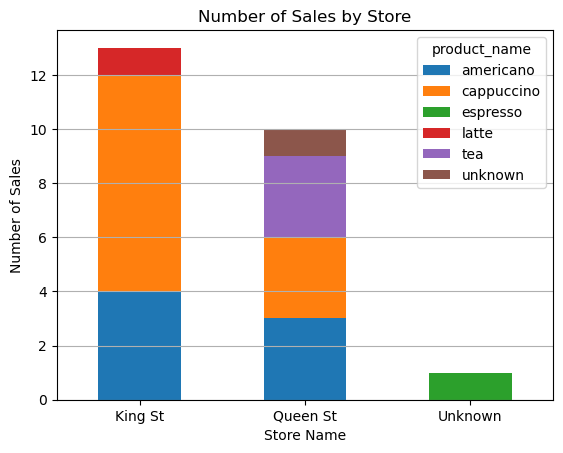

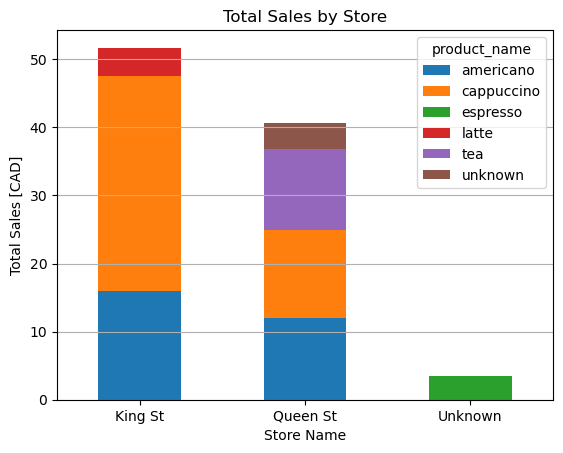

In [43]:
def visualize_sale_by_store_product():
    # Cross tab store, product
    store_prod_num = pd.crosstab(index=df['store_name'], columns=df['product_name'])\
        .reset_index().fillna(0)

    store_prod_num_plot = store_prod_num.plot.bar(x='store_name', y=['americano', 'cappuccino', 'espresso', 'latte', 'tea', 'unknown'], stacked=True)
    store_prod_num_plot.set_title('Number of Sales by Store')
    store_prod_num_plot.set_xlabel('Store Name')
    store_prod_num_plot.set_ylabel('Number of Sales')
    store_prod_num_plot.set_xticklabels(['King St','Queen St','Unknown'], rotation=0)
    store_prod_num_plot.grid(axis='y', which='both')
    plt.show()

    # Cross tab store, product, with values as price sum
    store_prod_sales = pd.crosstab(index=df['store_name'], columns=df['product_name'], values=df['price'], aggfunc='sum')\
        .reset_index().fillna(0)

    store_prod_sales_plot = store_prod_sales.plot.bar(x='store_name', y=['americano', 'cappuccino', 'espresso', 'latte', 'tea', 'unknown'], stacked=True)
    store_prod_sales_plot.set_title('Total Sales by Store')
    store_prod_sales_plot.set_xlabel('Store Name')
    store_prod_sales_plot.set_ylabel('Total Sales [CAD]')
    store_prod_sales_plot.set_xticklabels(['King St','Queen St','Unknown'], rotation=0)
    store_prod_sales_plot.grid(axis='y', which='both')
    plt.show()

visualize_sale_by_store_product()

Let's visualize how many client exclusively attend 1 store vs multiple stores to see if we can customize each store's offering by how exclusive their markets are.

In [44]:
# Drop transacs w unknown stores or clients
df_known = df[(df.store_name != 'unknown') & (df.client_name != 'unknown')]

# King St clients
df_kings = df_known[df_known.store_name == 'King St']
kings = set(df_kings.client_name)

# Queen St clients
df_queens = df_known[df_known.store_name == 'Queen St']
queens = set(df_queens.client_name)

#Exclusive
num_kings = len(kings -  queens)
num_queens = len(queens - kings)
num_both = len(kings.intersection(queens))

print('num_kings={}, num_queens={}, num_both={}'.format(num_kings, num_queens, num_both))

num_kings=4, num_queens=3, num_both=3


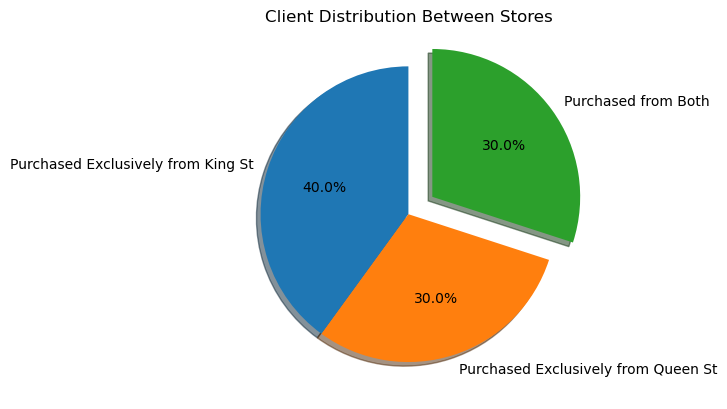

In [45]:
def visualize_client_distribution():
    exclusive_data = {'Purchased Exclusively from King St':num_kings, 'Purchased Exclusively from Queen St':num_queens, 'Purchased from Both':num_both}
    plt.pie(exclusive_data.values(), labels=exclusive_data.keys(), autopct='%1.1f%%', startangle=90, explode=[0, 0, 0.2], shadow=True)
    plt.title("Client Distribution Between Stores")
    plt.show()

visualize_client_distribution()

Let's visualize repeat business to determine client retention.

In [46]:
purchses_per_client = df[(df.client_name != 'unknown')].reset_index().groupby('client_name').agg({'transaction_id':'count'})
num_repeat_business = purchses_per_client[(purchses_per_client.transaction_id > 1)].shape[0]
num_single_business = purchses_per_client[(purchses_per_client.transaction_id <= 1)].shape[0]
print('{} clients made 1 purchase. {} made multiple purchases.'.format(num_single_business, num_repeat_business))

7 clients made 1 purchase. 4 made multiple purchases.


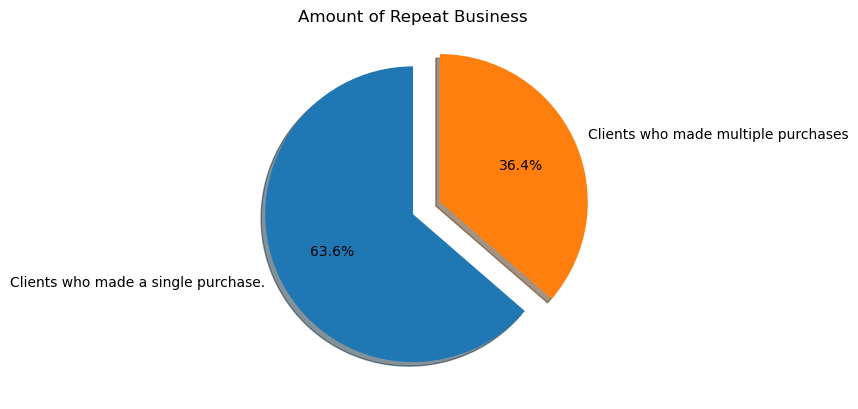

In [47]:
def visualize_retention():
    retention_data = {'Clients who made a single purchase.':num_single_business, 'Clients who made multiple purchases':num_repeat_business}
    plt.pie(retention_data.values(), labels=retention_data.keys(), autopct='%1.1f%%', startangle=90, explode=[0, 0.2], shadow=True)
    plt.title("Amount of Repeat Business")
    plt.show()

visualize_retention()

### 5. Calculate the total amount spent by each client and identify the top-spending clients.

In [48]:
client_spending = df.groupby('client_name').agg({'price':'sum'})\
    .rename(columns={'price':'total_purchases'})\
    .sort_values('total_purchases', ascending=False)

client_spending

,total_purchases
client_name,
Thalia Goodwin,20.45
Joshua Farley,17.00
Ananya Werner,16.90
Miranda Nash,13.00
Gabriel Palmer,4.50
Louis Jackson,4.50
Emily Johnson,4.20
Christopher Thomas,4.00
unknown,4.00


Above is a table of all clients' total purchases, listed from highest to lowest.

### 6. Write a SQL query to find all clients from the store “King St” whose latest purchase was a “cappuccino”. Sort the clients by the total amount spent on all purchases. Show the client names and their total spending.

In [49]:
QUERY = """
SELECT client_name, SUM(price) as total_spending

FROM df INNER JOIN (

    SELECT df.client_name as valid_clients

    FROM df INNER JOIN (

        SELECT client_name, MAX(transaction_date) AS latest_date
        FROM df
        GROUP BY client_name

    ) latest_transactions

    ON df.client_name = latest_transactions.client_name
    AND df.transaction_date = latest_transactions.latest_date

    WHERE store_name = "King St"
    AND product_name = "cappuccino"

) valid_clients

ON client_name = valid_clients

GROUP BY client_name
ORDER BY total_spending DESC
"""

### 7.  Validate the query’s optimization by explaining its execution plan. Discuss any indexes or optimizations that can be applied to improve its performance.


**Execution Plan**

The first subquery, "latest_transactions", returns each client's name and the time of their latest transactions. It does so by grouping the DataFrame (df) by client_name and selecting the max transaction_time.

The second subquery, "valid_clients", returns each clients name whos latest purchase was a "cappuccino" from "king st". It does so by joining the df with latest_trasactions on client_name and the time of latest transaction, ensuring that only transaction data for each customer's most recent purchase is present, then filters to keep only those transactions which were a cappuccinno from king st.

The main query returns the total spenditure of the valid clients determined in the previous subquery. It does so by joining the df with valid_clients on client name, ensuring that all transaction data is present for only valid clients. Then, it groups by client_name and sums up each of their "price", renamed to "total_spending". Finally, it orders tuples in descending order of their "total_spending" as instructed.

**Optimization**

Creating an index on the "client_name" and "transaction_date" colummns could speed up the joins as indexing allows for faster lookup and retrieval of specific rows based on the indexed columns.

Suppose the given dataset was significantly larger. Indexing the "store_name" and "product_name" columns can improve the filtering process during the join, reducing the number of rows involved in subsequent operations.

Partitioning df based on the transaction_date column can improve query performance as it splits the data into smaller, more manageable portions, allowing for faster data retrieval and aggregation operations.

### 8.  Execute the query using Python and display the results.

In [50]:
sql(QUERY)

,client_name,total_spending
0,Joshua Farley,17.0
1,Miranda Nash,13.0
2,Gabriel Palmer,4.5
3,Jennifer Brown,0.0


Note: Jennifer's total spending is shown as $0 because that is the default value I chose for missing price values. Her only purchase, a cappuccino from King St, was missing its price. I could not safely guess the price of this drink because it sold for different prices in the dataset, even at the same store. In industry, I would communicate with the stakeholder on how to resolve or ignore Jennifer all together.

### 9. Write a summary of the key findings from the data analysis and suggest actionable insights based on the results that would help this customer improve their business.

**Investment in/downsizing the production of certain products**

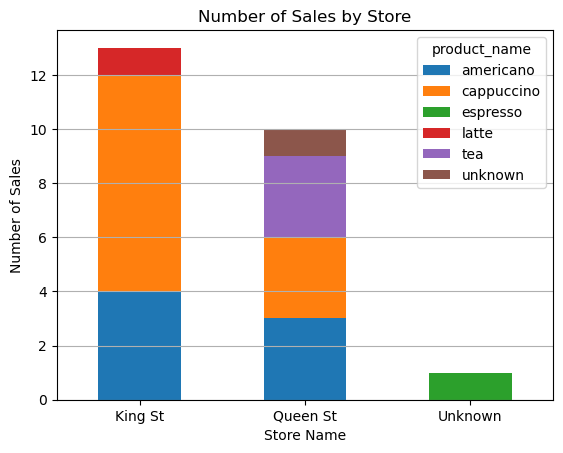

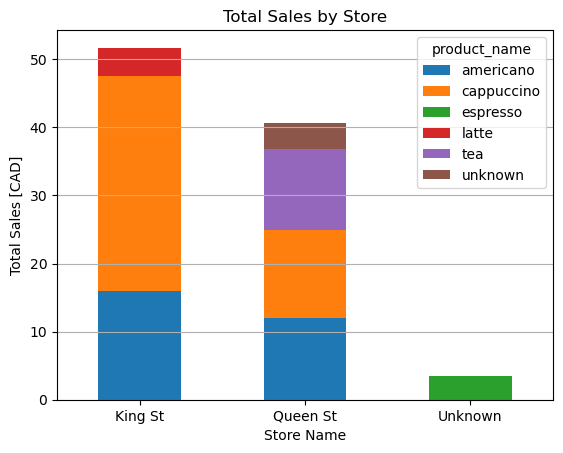

In [51]:
visualize_sale_by_store_product()

As evident above, cappuccino and americano are major sources of revenue for both locations, especially at King St. This is a valuable insight for the business as they can decide to invest in cappuccino/americano equipment to increase production and quality to capitalize on these items' popularities.

Espresso appears to not be a popular product at either store. This insight is useful as the business can limit expenses by downsizing or eliminating their esspresso production to limit a business expense which doesn't lead to much revenue.

Lattes appear to only sell at King St, and teas at queen st. This is also a valuable insight as the business can limit production and equiment for teas at king st. and lattes at queen st to reduce business expenses which don't convert into sales. However, before moving on this, more information is required. How many clients shop at both stores? If it is many, this inconsistency between the stores may not be worth it as they can come to expect a consistancy in the businesses brand. Let's examine below:

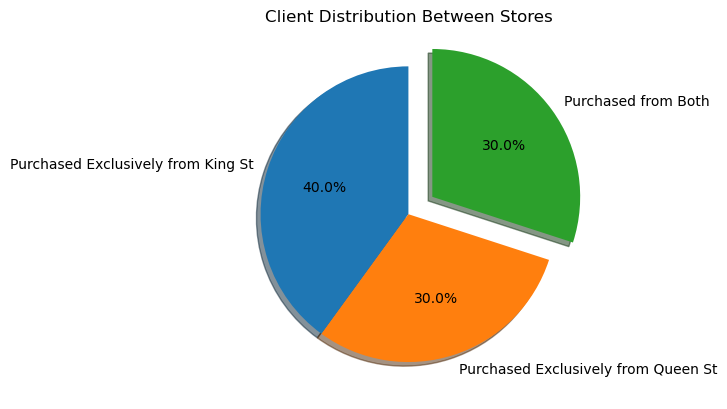

In [52]:
visualize_client_distribution()

It appears that the vast majority of clients do not shop at both stores. Therefore, the idea of limiting teas at king st. and lattes at queen st to reduce expenses is worth exploring further.

**Client Retention**

Let's analyze the amount of repeat business the company experiences.

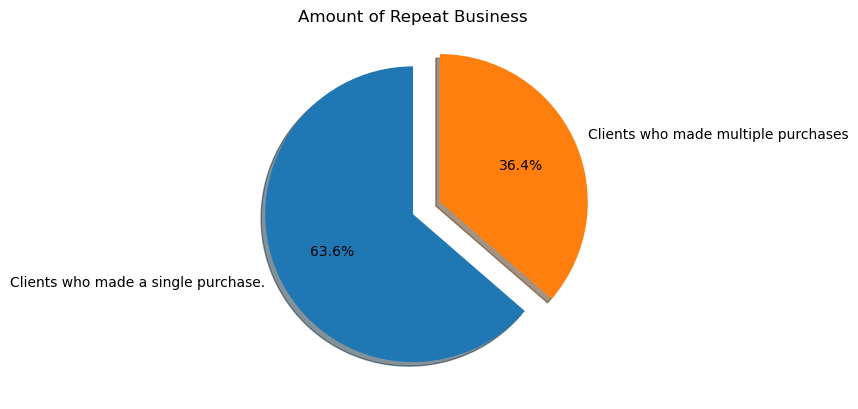

In [53]:
visualize_retention()

About 1/3 of clients made multiple purchases. This leaves much room for increasing the companies client retention, as 2/3 customers left without being impressed/incetivized enough to come back. Retention is important as it turns 1 sale into a steady, reliable stream of future sales and revenue, especially in a business like coffee/tea which can be a daily habit. The company could increase retention by ensuring high quality products, customer service, and a customer loyalty/rewards program.